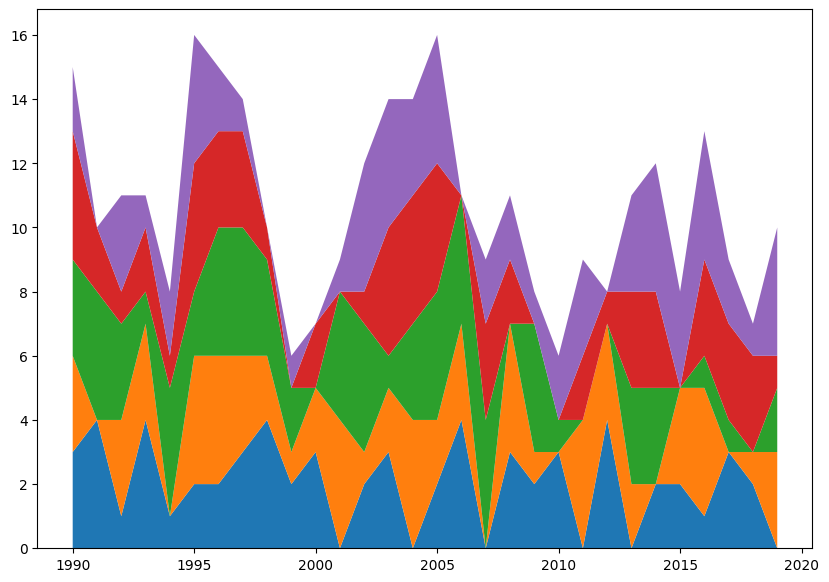

In [1]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

x = np.arange(1990, 2020) # (N,) array-like

y = [np.random.randint(0, 5, size=30) for _ in range(5)] # (M, N) array-like

fig, ax = plt.subplots(figsize=(10, 7))
ax.stackplot(x, y);

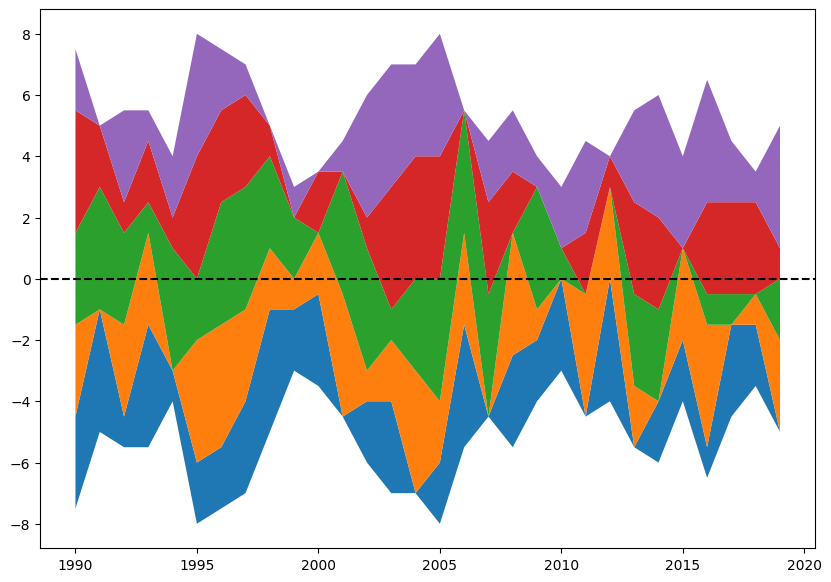

In [2]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.stackplot(x, y, baseline="sym")
ax.axhline(0, color="black", ls="--");

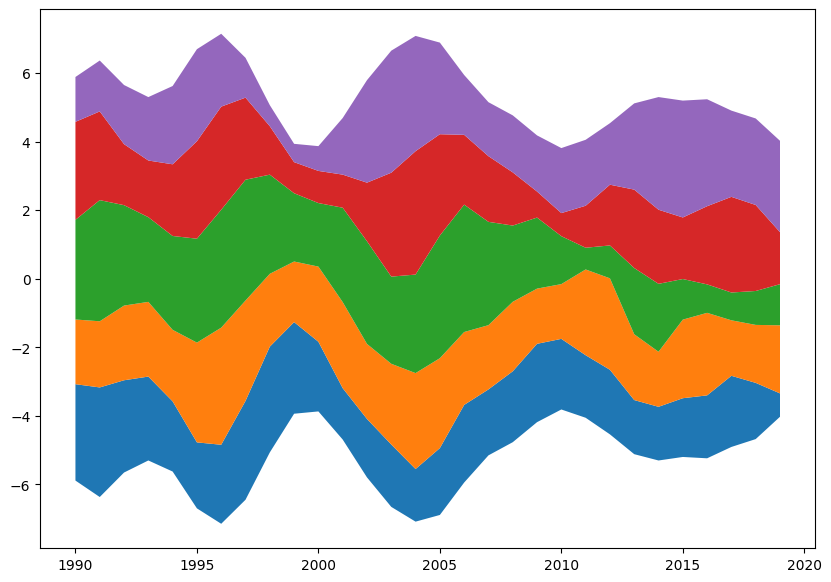

In [3]:
def gaussian_smooth(x, y, sd):
    weights = np.array([stats.norm.pdf(x, m, sd) for m in x])
    weights = weights / weights.sum(1)
    return (weights * y).sum(1)
fig, ax = plt.subplots(figsize=(10, 7))
y_smoothed = [gaussian_smooth(x, y_, 1) for y_ in y]
ax.stackplot(x, y_smoothed, baseline="sym");

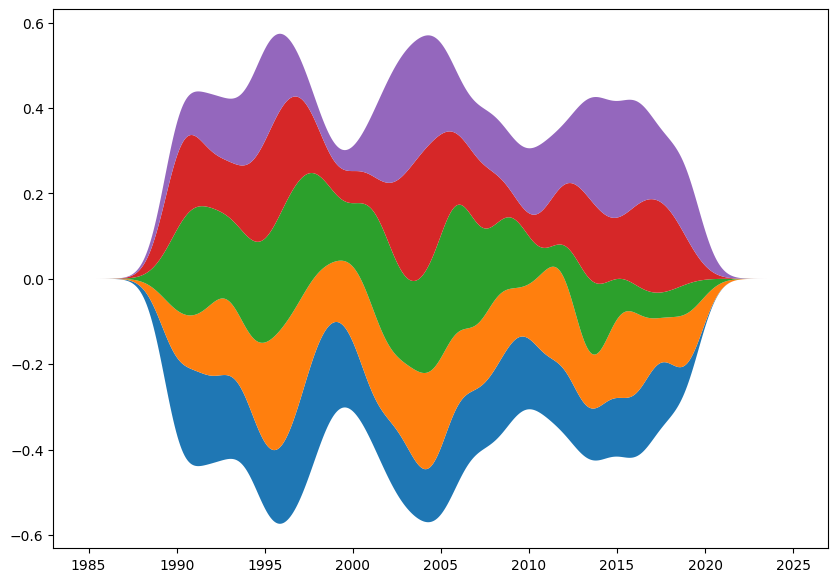

In [4]:
def gaussian_smooth(x, y, grid, sd):
    weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x])
    weights = weights / weights.sum(0)
    return (weights * y).sum(1)
fig, ax = plt.subplots(figsize=(10, 7))
grid = np.linspace(1985, 2025, num=500)
y_smoothed = [gaussian_smooth(x, y_, grid, 1) for y_ in y]
ax.stackplot(grid, y_smoothed, baseline="sym");

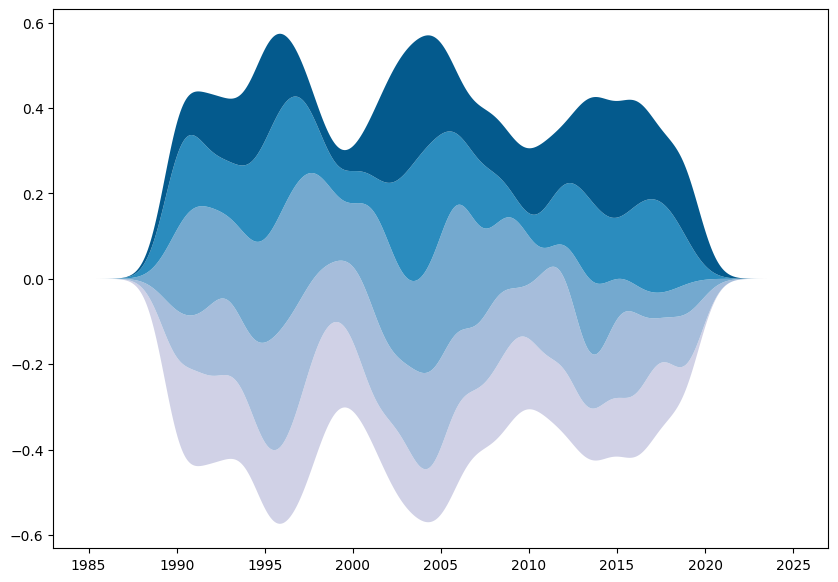

In [5]:
COLORS = ["#D0D1E6", "#A6BDDB", "#74A9CF", "#2B8CBE", "#045A8D"]
fig, ax = plt.subplots(figsize=(10, 7))
# Colors in the `COLORS` list are assigned to individual areas from bottom to top.
ax.stackplot(grid, y_smoothed, colors=COLORS, baseline="sym");
